### Steps followed
1. Web scraping
    * www.goldpriceindia.com website contains daily gold price data
2. Data preparation
    * Combining all the .csv files to a single dataframe
3. Importing all the files
4. 

In [ ]:
import requests
from bs4 import BeautifulSoup
import csv

month_list =['january','february','march','april','may','june','july','august','september','october','november','december']
year = [i for i in range(2010,2024,1)] # Because range step function doesn't include max value [min, max)

# I suggest you to reduce the year list to a max of 2-3 years to prevent getting blocked by the bot
for year in year_list
    for month in month_list:

        page = requests.get('https://www.goldpriceindia.com/gold-price-' + month + '-'+str(year)+'.php')
        soup = BeautifulSoup(page.text, 'html.parser')


        h4_title = soup.find_all('h4')

        list_h4 =[]
        for i in h4_title :
            value = i.text
            list_h4.append(value)

        print(list_h4)

        table_data = soup.find_all(class_= 'table-data dayyeartable')


        with open('dataset'+year+'.csv','a') as csvfile:
            csvwriter = csv.writer(csvfile , delimiter =',', quoting=csv.QUOTE_MINIMAL )
            count =0
            for td in table_data:

                th = td.find_all('th')
            # add that to csv
                l =[]
                tds = td.find_all('td')
                m =[]
                for i in tds:
                    value = i.text
                    m.append(value.encode('ascii', 'ignore').decode('ascii'))
                if(len(m)==4):
                    continue
                for i in th:
                    l.append(i.text)

                date = str(list_h4[count])[14:]
                day = date[:2]
                year = date[-4:]
                dicti = {'january':'01','february':'02','march':'03','april':'04','may':'05','june':'06','july':'07','august':'08','september':'09'
                ,'october':'10','november':'11','december':'12'}
                for key,value in dicti.items():
                    if(key == month):
                        month_value = value
                p=int(m[1].replace(",",""))
                csvwriter.writerow([day+'-'+month_value+'-'+year, p])
                print(m)
                count = count +1

In [3]:
import csv
import os

# dir1 ="/home/nihali/work/5thsem/DataAnalytics/project"
# list_dir = os.listdir(dir1)
import glob
path = "./data/*.csv"
with open('./Combined_data/final_df.csv','w') as csvv:
    csvwriter = csv.writer(csvv, delimiter =',', quoting=csv.QUOTE_MINIMAL)
    print("hello")
    for fname in glob.glob(path):
        print(fname)
        with open(fname,'r') as csvfile:
            csvreader = csv.reader(csvfile, delimiter =',', quoting=csv.QUOTE_MINIMAL )
            for row in csvreader:
                # print(row)
                # print(row[0])
                csvwriter.writerow(row)

hello
./data/dataset2023.csv
./data/dataset2022.csv
./data/dataset2020.csv
./data/dataset2021.csv
./data/dataset2019.csv
./data/dataset2018.csv
./data/dataset2016.csv
./data/dataset2017.csv
./data/dataset2015.csv
./data/dataset2014.csv
./data/dataset2010.csv
./data/dataset2011.csv
./data/dataset2013.csv
./data/dataset2012.csv


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# pandas and numpy are used for data manipulation
import pandas as pd
import numpy as np
from math import sqrt
from numpy import log
from pandas import Series

from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, arma_order_select_ic
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import statsmodels as sm

# matplotlib and seaborn are used for plotting graphs
import matplotlib.pyplot as plt
from matplotlib.dates import date2num
import seaborn as sns
from datetime import datetime
import subprocess

In [47]:
ds_gold = 'GOLD_PRICE(INR)'
ds_etf = 'Close'
date_format = '%d-%m-%Y'
df = pd.read_csv("./Combined_data/final_df.csv", names = ['DATE','GOLD_PRICE(INR)'], header=None)     

In [48]:
df

,DATE,GOLD_PRICE(INR)
0,31-01-2023,5688
1,30-01-2023,5675
2,29-01-2023,5687
3,28-01-2023,5687
4,27-01-2023,5676
...,...,...
4855,05-12-2012,3121
4856,04-12-2012,3098
4857,03-12-2012,3128
4858,02-12-2012,3111


In [49]:
# df = df[['Name', ds_gold]]
df['DATE'] = [datetime.strptime(i, date_format) for i in df['DATE']]
df.set_index('DATE')
# df.index = pd.to_datetime(df.index, format=date_format)
print(df.columns)
dd = df

Index(['DATE', 'GOLD_PRICE(INR)'], dtype='object')


In [50]:
dd

,DATE,GOLD_PRICE(INR)
0,2023-01-31,5688
1,2023-01-30,5675
2,2023-01-29,5687
3,2023-01-28,5687
4,2023-01-27,5676
...,...,...
4855,2012-12-05,3121
4856,2012-12-04,3098
4857,2012-12-03,3128
4858,2012-12-02,3111


In [51]:
df = df.dropna()

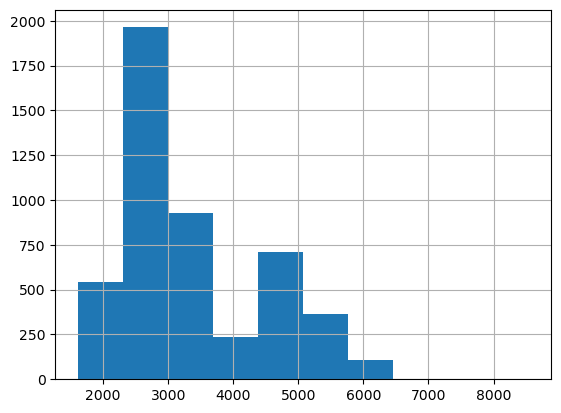

In [52]:
df[ds_gold].hist()
plt.show()

In [53]:
log_transform = log(df[ds_gold])
print(min(log_transform), max(log_transform))

7.3833681469923835 9.052516286782616


/var/folders/nr/gvzbls3x2pqdg806mj74vthc0000gp/T/ipykernel_65339/1887224665.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[ds_gold])


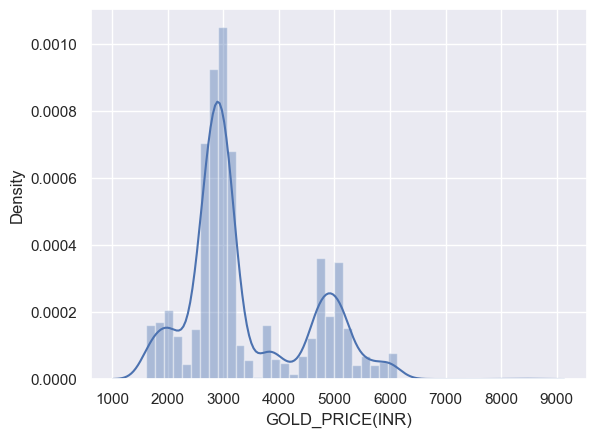

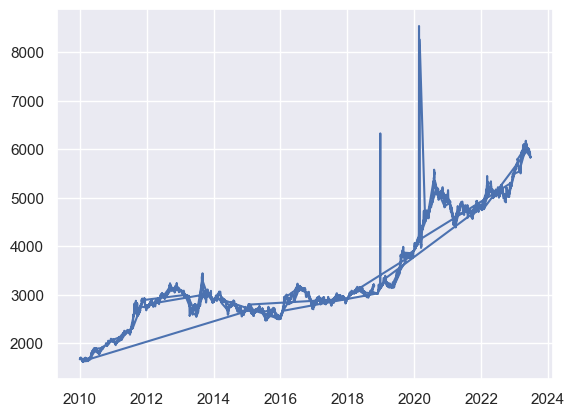

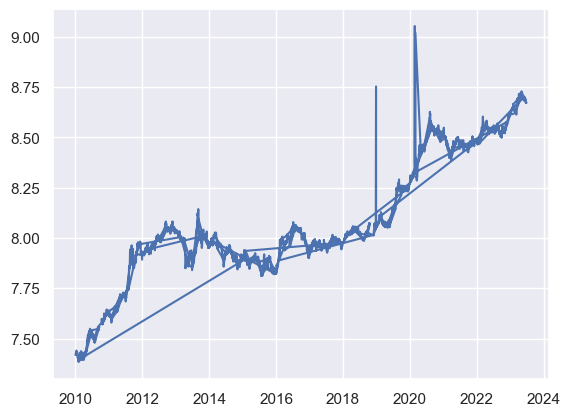

In [54]:
sns.set()
sns.distplot(df[ds_gold])
plt.show()

plt.plot(df['DATE'], df[ds_gold])
plt.show()

plt.plot(df['DATE'], log_transform)
plt.show()

# Can be used to show non stationary

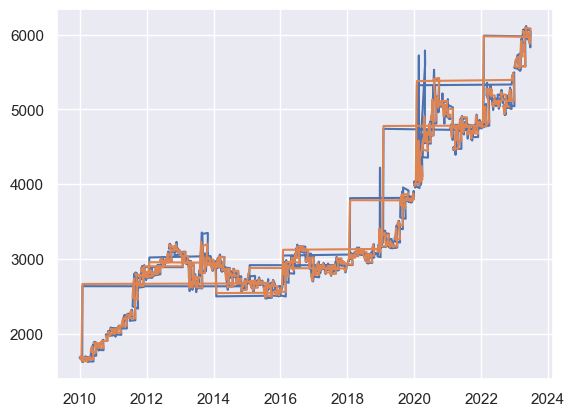

12    5644
13    5652
14    5640
15    5649
16    5634
Name: GOLD_PRICE(INR), dtype: int64

In [55]:
# Define exploratory variables
# Finding moving average of past 3 days and 9 days
df['S_1'] = df[ds_gold].shift(1).rolling(window=3).mean()
df['S_2'] = df[ds_gold].shift(1).rolling(window=12).mean()
df = df.dropna()
X = df[['S_1', 'S_2']]
X.head()
plt.plot(df['DATE'], df['S_1'])
plt.plot(df['DATE'], df["S_2"])
plt.show()


# dependent variable
y = df[ds_gold]
y.head()


In [56]:
# Split into train and test
t = 0.2

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=t, shuffle=False)

Gold Price = 0.84 * 2 Month Moving Average 0.16 * 1 Month Moving Average + 11.36


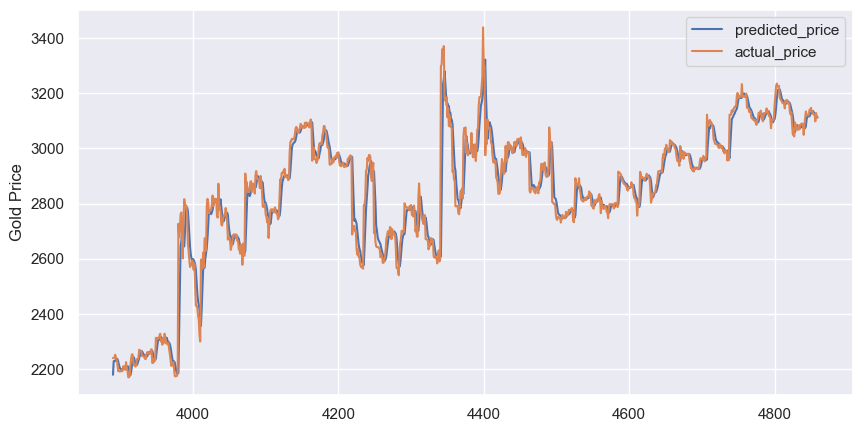

R square for regression 94.2


61.04594565618981

In [57]:
# Performing linear regression
linear = LinearRegression().fit(X_train, y_train)

print("Gold Price =", round(linear.coef_[0], 2), "* 2 Month Moving Average", round(
    linear.coef_[1], 2), "* 1 Month Moving Average +", round(linear.intercept_, 2))

# Predict prices
predicted_price = linear.predict(X_test)

predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(10, 5))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold Price")
plt.show()

# Calculate R square and rmse to check goodness of fit
r2_score = linear.score(X_test, y_test)*100
print("R square for regression", float("{0:.2f}".format(r2_score)))
sqrt(mean_squared_error(y_test,predicted_price))

# We observe significantly different accuracies for same dataset in USD and INR.
# The reason for this difference could be attributed to the

In [58]:
# Check stationarity
X = df[ds_gold]
split = len(X) // 2
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

result_of_adfuller = adfuller(df[ds_gold])
print('ADF Statistic: %f' % result_of_adfuller[0])
print('p-value: %f' % result_of_adfuller[1])
print('Critical Values:')
for key, value in result_of_adfuller[4].items():
    print('\t%s: %.3f' % (key, value))

# we can conclude it has time dependent structure and cannot reject null hypothesis.

mean1=4107.167079, mean2=2626.304868
variance1=1018106.332370, variance2=168702.956543
ADF Statistic: -2.456977
p-value: 0.126296
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


int64
int64
         DATE  GOLD_PRICE(INR)          S_1          S_2
12 2023-01-19             5644  5666.333333  5679.000000
13 2023-01-18             5652  5659.000000  5675.333333
14 2023-01-17             5640  5654.333333  5673.416667
15 2023-01-16             5649  5645.333333  5669.500000
16 2023-01-15             5634  5647.000000  5666.333333


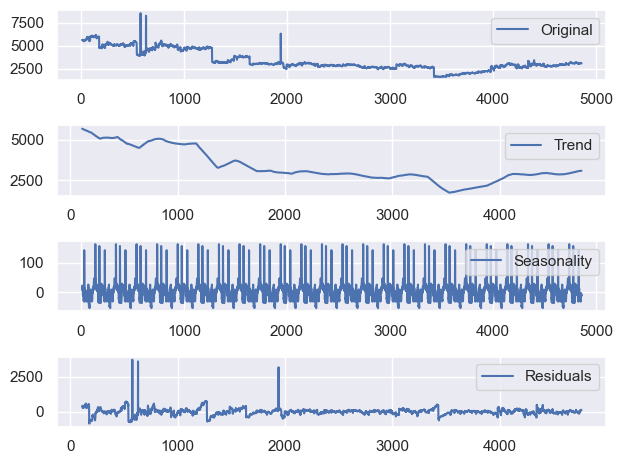

In [60]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# print(df.index.dtype)
# print(df[ds_gold].dtype)
# decomposition = seasonal_decompose(df[ds_gold], period = 200)

# trend = decomposition.trend
# seasonal = decomposition.seasonal
# residual = decomposition.resid

# plt.subplot(411)
# plt.plot(df[ds_gold], label='Original')
# plt.legend(loc='best')
# plt.subplot(412)
# plt.plot(trend, label='Trend')
# plt.legend(loc='best')
# plt.subplot(413)
# plt.plot(seasonal,label='Seasonality')
# plt.legend(loc='best')
# plt.subplot(414)
# plt.plot(residual, label='Residuals')
# plt.legend(loc='best')
# plt.tight_layout()

# print(df.head())

In [61]:
# Now taking log transform
log_transform = log(df[ds_gold])
result_of_adfuller = adfuller(log_transform)
print('ADF Statistic: %f' % result_of_adfuller[0])
print('p-value: %f' % result_of_adfuller[1])
print('Critical Values:')
for key, value in result_of_adfuller[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.394854
p-value: 0.143194
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


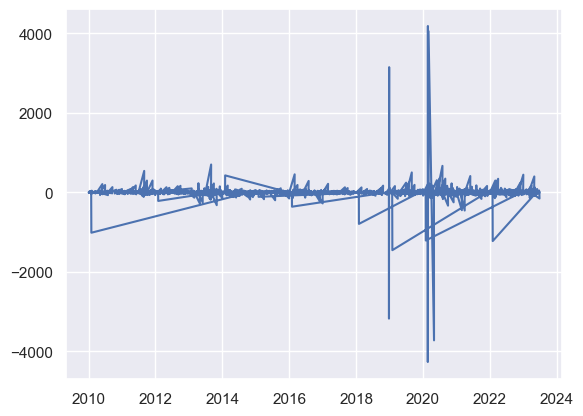

ADF Statistic: -32.449974
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [63]:

# To remove trends, differencing of order 1
k = df[ds_gold].diff()
plt.plot(df['DATE'], k)
plt.show()
# print(k.head())
k = k.dropna()

# check stationarity after differencing
result_of_adfuller = adfuller(k)
print('ADF Statistic: %f' % result_of_adfuller[0])
print('p-value: %f' % result_of_adfuller[1])
print('Critical Values:')
for key, value in result_of_adfuller[4].items():
    print('\t%s: %.3f' % (key, value))


# So now we can say with 1 % confidence level that its stationary
# We can do other stuff now

          S_1       S_2
25  -2.000000 -5.916667
26 -18.666667 -8.583333
27 -13.666667 -9.000000
28   5.000000 -5.083333
29   7.666667 -5.166667


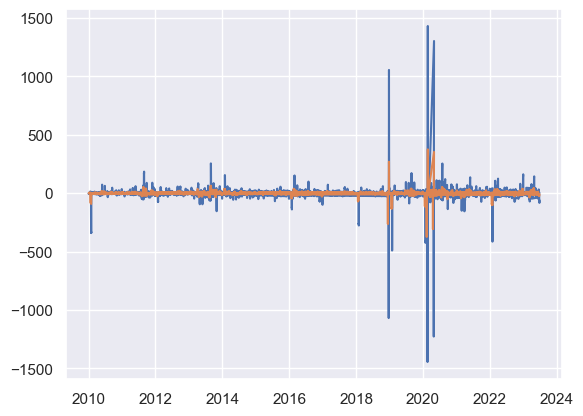

Gold Price = -0.85 * 2 Month Moving Average -1.09 * 1 Month Moving Average + -2.57


/var/folders/nr/gvzbls3x2pqdg806mj74vthc0000gp/T/ipykernel_65339/2846352098.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['S_1'] = df[ds_gold].shift(1).rolling(window=3).mean()
/var/folders/nr/gvzbls3x2pqdg806mj74vthc0000gp/T/ipykernel_65339/2846352098.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['S_2'] = df[ds_gold].shift(1).rolling(window=12).mean()


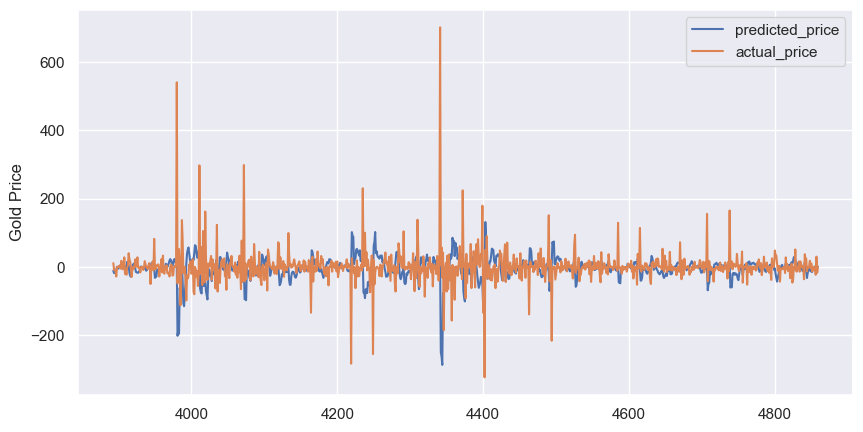

R square for regression -38.36


57.05105863566845

In [64]:
# Again regression
df[ds_gold] = k
# Finding moving average of past 3 days and 9 days
df['S_1'] = df[ds_gold].shift(1).rolling(window=3).mean()
df['S_2'] = df[ds_gold].shift(1).rolling(window=12).mean()
df = df.dropna()
X = df[['S_1', 'S_2']]
X.head()
print(X.head())
plt.plot(df['DATE'], df['S_1'])
plt.plot(df['DATE'], df["S_2"])
plt.show()

df['S_1'] = df[ds_gold].shift(1).rolling(window=3).mean()
df['S_2'] = df[ds_gold].shift(1).rolling(window=12).mean()

# dependent variable
y = df[ds_gold]
y.head()
# print(y.head())

# Split into train and test
t = 0.2

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=t, shuffle=False)

# Performing linear regression
linear = LinearRegression().fit(X_train, y_train)

print("Gold Price =", round(linear.coef_[0], 2), "* 2 Month Moving Average", round(
    linear.coef_[1], 2), "* 1 Month Moving Average +", round(linear.intercept_, 2))

# Predict prices
predicted_price = linear.predict(X_test)

predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(10, 5))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold Price")
plt.show()

# Calculate R square and rmse to check goodness of fit
r2_score = linear.score(X_test, y_test)*100
print("R square for regression", float("{0:.2f}".format(r2_score)))
sqrt(mean_squared_error(y_test,predicted_price))

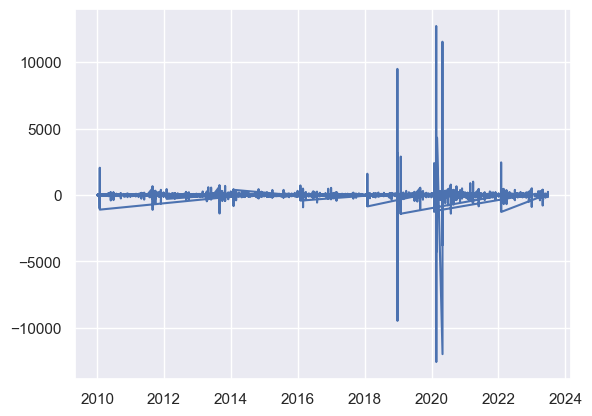

ADF Statistic: -28.823930
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [65]:
# Trying 2nd order differencing
k = df[ds_gold].diff().diff()
plt.plot(df['DATE'], k)
plt.show()
# print(k.head())
k = k.dropna()

# check stationarity after differencing
result_of_adfuller = adfuller(k)
print('ADF Statistic: %f' % result_of_adfuller[0])
print('p-value: %f' % result_of_adfuller[1])
print('Critical Values:')
for key, value in result_of_adfuller[4].items():
    print('\t%s: %.3f' % (key, value))

/var/folders/nr/gvzbls3x2pqdg806mj74vthc0000gp/T/ipykernel_65339/1655173674.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ds_gold] = k
/var/folders/nr/gvzbls3x2pqdg806mj74vthc0000gp/T/ipykernel_65339/1655173674.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['S_1'] = df[ds_gold].shift(1).rolling(window=3).mean()
/var/folders/nr/gvzbls3x2pqdg806mj74vthc0000gp/T/ipykernel_65339/1655173674.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

          S_1       S_2
39 -17.000000 -4.583333
40  -0.666667 -4.166667
41 -12.000000  4.250000
42  17.000000  3.416667
43 -21.666667 -6.250000


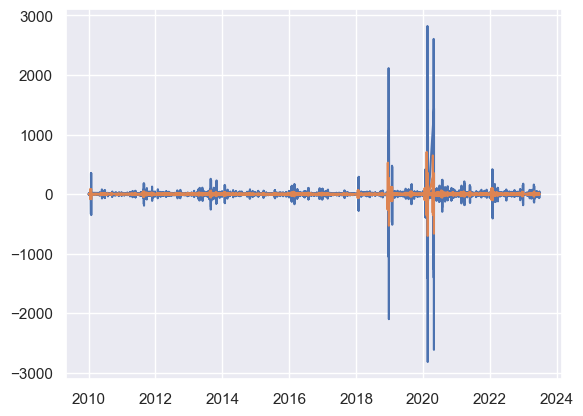

Gold Price = -1.65 * 2 Month Moving Average -6.6 * 1 Month Moving Average + -0.0


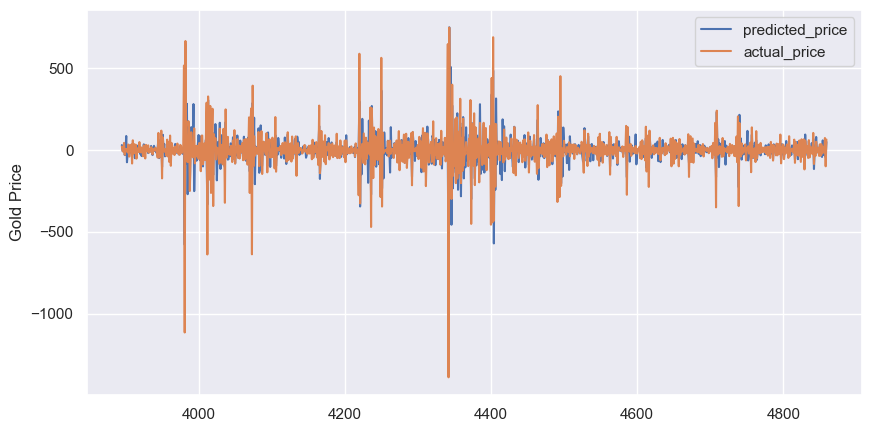

R square for regression 52.58
RMSE:  84.87332595764781


In [66]:
# Again regression
df[ds_gold] = k
# Finding moving average of past 3 days and 9 days
df['S_1'] = df[ds_gold].shift(1).rolling(window=3).mean()
df['S_2'] = df[ds_gold].shift(1).rolling(window=12).mean()
df = df.dropna()
X = df[['S_1', 'S_2']]
X.head()
print(X.head())
plt.plot(df['DATE'], df['S_1'])
plt.plot(df['DATE'], df["S_2"])
plt.show()


# dependent variable
y = df[ds_gold]
y.head()
# print(y.head())
df['S_1'] = df[ds_gold].shift(1).rolling(window=3).mean()
df['S_2'] = df[ds_gold].shift(1).rolling(window=12).mean()
# Split into train and test
t = 0.2

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=t, shuffle=False)

# Performing linear regression
linear = LinearRegression().fit(X_train, y_train)

print("Gold Price =", round(linear.coef_[0], 2), "* 2 Month Moving Average", round(
    linear.coef_[1], 2), "* 1 Month Moving Average +", round(linear.intercept_, 2))

# Predict prices
predicted_price = linear.predict(X_test)

predicted_price = pd.DataFrame(
    predicted_price, index=y_test.index, columns=['price'])
predicted_price.plot(figsize=(10, 5))
y_test.plot()
plt.legend(['predicted_price', 'actual_price'])
plt.ylabel("Gold Price")
plt.show()

# Calculate R square and rmse to check goodness of fit
r2_score = linear.score(X_test, y_test)*100
print("R square for regression", float("{0:.2f}".format(r2_score)))
print("RMSE: ",sqrt(mean_squared_error(y_test,predicted_price)))

* Now after 2nd order differencing the results make sense, but are still unacceptably innacurate


#### Let us now try to make an ARMA model with the new non-stationary data

In [67]:
# order = arma_order_select_ic(df[ds_gold])
# print(df[ds_gold])
     

/Users/mowlanicab/miniconda3/envs/time_series_env/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/mowlanicab/miniconda3/envs/time_series_env/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/mowlanicab/miniconda3/envs/time_series_env/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


39       71.0
40      -44.0
41       24.0
42      -45.0
43       95.0
        ...  
4855    -13.0
4856    -17.0
4857     73.0
4858   -100.0
4859     64.0
Name: GOLD_PRICE(INR), Length: 4821, dtype: float64


/Users/mowlanicab/miniconda3/envs/time_series_env/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


/Users/mowlanicab/miniconda3/envs/time_series_env/lib/python3.11/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


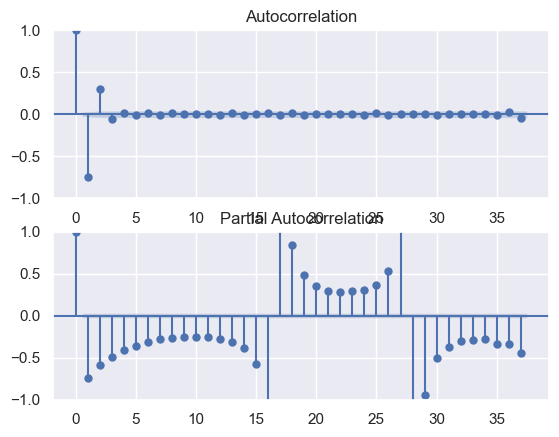

In [68]:
#ACF and PACF plots

series = df[ds_gold]
plt.figure()
plt.subplot(211)
plot_acf(series, ax=plt.gca())
plt.subplot(212)
plot_pacf(series, ax=plt.gca())
plt.show()

In [69]:
del df['S_1']
del df['S_2']

In [70]:
df

,DATE,GOLD_PRICE(INR)
39,2023-02-20,71.0
40,2023-02-19,-44.0
41,2023-02-18,24.0
42,2023-02-17,-45.0
43,2023-02-16,95.0
...,...,...
4855,2012-12-05,-13.0
4856,2012-12-04,-17.0
4857,2012-12-03,73.0
4858,2012-12-02,-100.0


In [72]:
# data = pd.Series(df['GOLD_PRICE(INR)'], index=df['DATE'])
# model = ARMA(data, order=(5,1))
# data

In [ ]:

# df['Name'] = df['Name'].values.astype(float)
# ts = pd.Series(df[ds_gold], index = df.index)
# print(ts.head())
# model = ARIMA(df[ds_gold].values, order=(1, 1, 1))  
# results_ARIMA = model.fit(disp=-1)  
# # np.asarray(dd)
# plt.plot(df)
# plt.plot(results_ARIMA.fittedvalues, color='red')
# plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))


In [73]:
# from statsmodels.tsa.statespace import SARIMAX
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(df[ds_gold].values,order=(2, 1, 2),seasonal_order=(2, 1, 2, 12),enforce_stationarity=False,enforce_invertibility=False)
results = mod.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.27903D+00    |proj g|=  4.37323D-01


 This problem is unconstrained.



At iterate    5    f=  7.02955D+00    |proj g|=  1.16408D-01

At iterate   10    f=  6.94919D+00    |proj g|=  1.49433D-01

At iterate   15    f=  6.87121D+00    |proj g|=  1.46038D-01

At iterate   20    f=  6.86587D+00    |proj g|=  2.88166D-02

At iterate   25    f=  6.86183D+00    |proj g|=  5.22562D-02

At iterate   30    f=  6.86103D+00    |proj g|=  6.85560D-02

At iterate   35    f=  6.86083D+00    |proj g|=  3.58251D-02

At iterate   40    f=  6.86082D+00    |proj g|=  2.15850D-03

At iterate   45    f=  6.86082D+00    |proj g|=  6.24211D-03

At iterate   50    f=  6.86075D+00    |proj g|=  8.73155D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/mowlanicab/miniconda3/envs/time_series_env/lib/python3.11/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [75]:

results.summary()
df['sarimax_predict'] = results.predict()

In [77]:
df

,DATE,GOLD_PRICE(INR),sarimax_predict
39,2023-02-20,71.0,0.000000
40,2023-02-19,-44.0,47.953196
41,2023-02-18,24.0,22.333127
42,2023-02-17,-45.0,-6.663890
43,2023-02-16,95.0,-18.717719
...,...,...,...
4855,2012-12-05,-13.0,-17.917367
4856,2012-12-04,-17.0,2.294933
4857,2012-12-03,73.0,45.408362
4858,2012-12-02,-100.0,-98.594880


In [76]:
# del df['S_1']
# del df['S_2']
df.plot(y = ['GOLD_PRICE(INR)','sarimax_predict'], x = df['DATE'])

KeyError: "None of [DatetimeIndex(['2023-02-20', '2023-02-19', '2023-02-18', '2023-02-17',\n               '2023-02-16', '2023-02-15', '2023-02-14', '2023-02-13',\n               '2023-02-12', '2023-02-11',\n               ...\n               '2012-12-10', '2012-12-09', '2012-12-08', '2012-12-07',\n               '2012-12-06', '2012-12-05', '2012-12-04', '2012-12-03',\n               '2012-12-02', '2012-12-01'],\n              dtype='datetime64[ns]', length=4821, freq=None)] are in the [columns]"

In [80]:

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 4821
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood              -33075.653
Date:                            Fri, 30 Jun 2023   AIC                          66169.307
Time:                                    15:21:11   BIC                          66227.558
Sample:                                         0   HQIC                         66189.769
                                           - 4821                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9738      0.006   -159.157      0.000      -0.986      -0.962
ar.L2         -0.4839      0.010    -50.561      0.000      -0.503      -0.465
ma.L1         -1.9963      0.023    -86.418      0.000      -2.042      -1.951
ma.L2          0.9976      0.023     43.962      0.000       0.953       1.042
ar.S.L12      -0.6241      2.442     -0.256      0.798      -5.411       4.162
ar.S.L24      -0.0038      0.129     -0.029      0.977      -0.257       0.249
ma.S.L12      -0.3820      2.430     -0.157      0.875      -5.144       4.380
ma.S.L24      -0.5908      2.386     -0.248      0.804      -5.266       4.085
sigma2      1.304e+05   2783.935     46.849      0.000    1.25e+05    1.36e+05
===================================================================================
Ljung-Box (L1) (Q):                 121.00   Jarque-Bera (JB):          30345550.78
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.06   Skew:                            -0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                       393.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

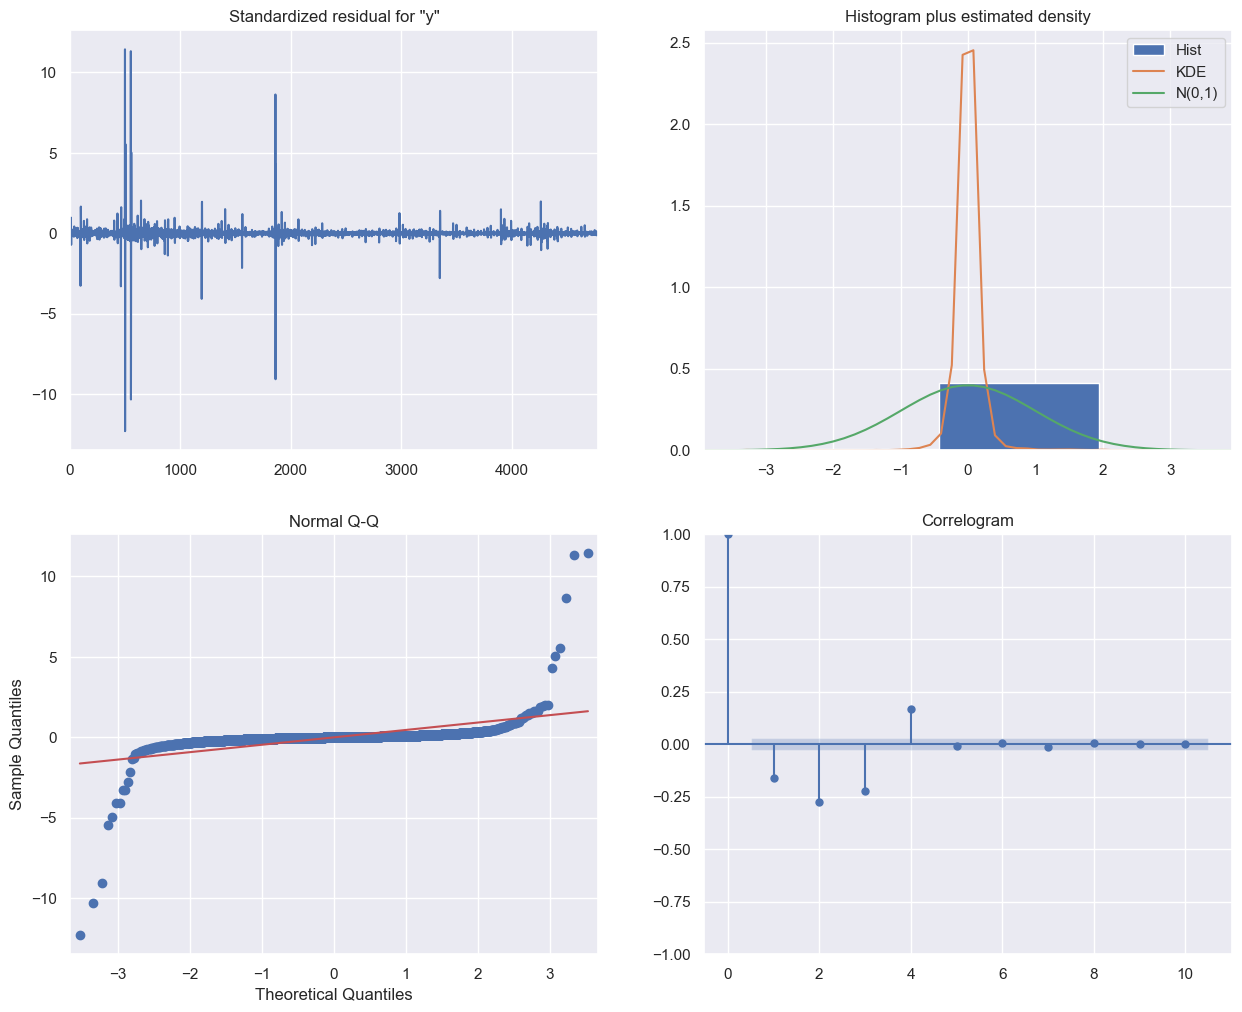

In [81]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()
     

In [82]:
print("RMSE: ",sqrt(mean_squared_error(df[ds_gold],df['sarimax_predict'])))
from sklearn.metrics import r2_score
print("R2 SCORE: ",r2_score(df[ds_gold],df['sarimax_predict']))
     

RMSE:  166.6132182253876
R2 SCORE:  0.860968110256857


In [83]:

import datetime as dt
     

/var/folders/nr/gvzbls3x2pqdg806mj74vthc0000gp/T/ipykernel_65339/4042007636.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(new_23,y_23, '.r',color='g')


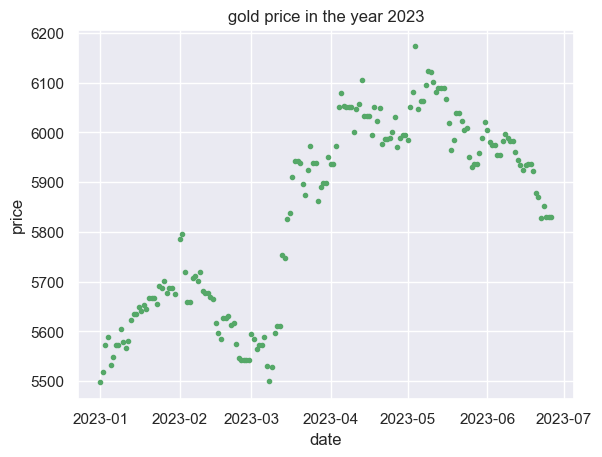

In [84]:

data = pd.read_csv("./data/dataset2023.csv") 
data.head()
x_23 = data.iloc[:,0]
y_23 = data.iloc[:,1]
new_23 = [dt.datetime.strptime(d,'%d-%m-%Y').date() for d in x_23]
plt.plot(new_23,y_23, '.r',color='g')
plt.xlabel('date')
plt.ylabel('price')
plt.title('gold price in the year 2023')
plt.show()

/var/folders/nr/gvzbls3x2pqdg806mj74vthc0000gp/T/ipykernel_65339/2593805183.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".r" (-> color='r'). The keyword argument will take precedence.
  plt.plot(X_new,y, '.r',color='g')


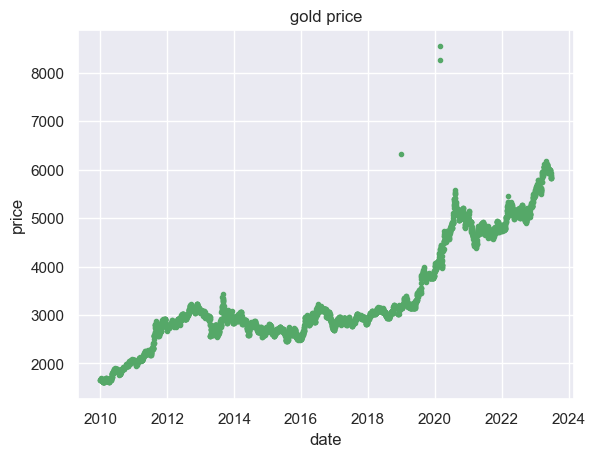

In [85]:
final_df = pd.read_csv("./Combined_data/final_df.csv")
X = final_df.iloc[:,0]
y = final_df.iloc[:,1]
X_new = [dt.datetime.strptime(d,'%d-%m-%Y').date() for d in X]
plt.plot(X_new,y, '.r',color='g')
plt.xlabel('date')
plt.ylabel('price')
plt.title('gold price')
plt.show()